In [17]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [14]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [74]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
import numpy as np
import pandas as pd
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt

In [19]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


In [23]:
#conda install -c conda-forge requests

import requests
requests.__version__

'2.22.0'

In [24]:
# Import the API key.
from config import weather_api_key

In [25]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3bb12566f1be46f148774e0759bbaf99


In [26]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3bb12566f1be46f148774e0759bbaf99&q=Boston


In [27]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [28]:
city_weather.status_code

200

In [29]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [31]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [32]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02n"}],"base":"stations","main":{"temp":19.04,"feels_like":3.97,"temp_min":15.01,"temp_max":23,"pressure":1029,"humidity":27},"visibility":16093,"wind":{"speed":14.99,"deg":340,"gust":24.16},"clouds":{"all":20},"dt":1581718734,"sys":{"type":1,"id":3486,"country":"US","sunrise":1581680578,"sunset":1581718448},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [33]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 19.04,
  'feels_like': 3.97,
  'temp_min': 15.01,
  'temp_max': 23,
  'pressure': 1029,
  'humidity': 27},
 'visibility': 16093,
 'wind': {'speed': 14.99, 'deg': 340, 'gust': 24.16},
 'clouds': {'all': 20},
 'dt': 1581718734,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1581680578,
  'sunset': 1581718448},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [34]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [35]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [36]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 18.97,
  'feels_like': 3.9,
  'temp_min': 15.01,
  'temp_max': 23,
  'pressure': 1029,
  'humidity': 27},
 'visibility': 16093,
 'wind': {'speed': 14.99, 'deg': 340, 'gust': 24.16},
 'clouds': {'all': 20},
 'dt': 1581719542,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1581680578,
  'sunset': 1581718448},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [37]:
# Get the JSON data.
boston_data = city_weather.json()

In [38]:
boston_data['sys']

{'type': 1,
 'id': 3486,
 'country': 'US',
 'sunrise': 1581680578,
 'sunset': 1581718448}

In [40]:
boston_data['sys']['country']

'US'

In [42]:
boston_data['dt']

1581719542

In [43]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 23 27 20 14.99


In [44]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 2, 14, 22, 32, 22)

In [45]:
 datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-02-14 22:32:22'

In [59]:
# Create an empty list to hold the weather data.
city_data = []


# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Beginning Data Retrieval     
-----------------------------


In [60]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [61]:
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")
    

Processing Record 1 of Set 1 | esperance
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | leeton
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1 | kuusamo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1 | tra vinh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 1 | pathein
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 1 | bethel
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 1 | sataua
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 1 | busselton
----------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 2 | lompoc
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 2 | barra patuca
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 2 | bredasdorp
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 2 | alofi
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 2 | lasa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 2 | cape town
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 2 | norman wells
-----------------------------
Data Retrieval Complete      
---------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 3 | taunggyi
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 3 | golden
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 3 | khatanga
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 3 | majenang
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 3 | waingapu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 3 | port alfred
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 3 | kiunga
-----------------------------
Data Retrieval Complete      
------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 4 | isangel
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 4 | mount isa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 4 | bengkulu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 4 | axim
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 4 | chernyshevskiy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 4 | zomba
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 4 | the valley
-----------------------------
Data Retrieval Complete      
----------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 5 | vostok
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 5 | lolua
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 6 | tubmanburg
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 6 | mahadday weyne
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 6 | pimentel
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 6 | tuatapere
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 6 | tubruq
City not found. Skipping...
--

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 7 | sioux lookout
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 7 | yangambi
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 7 | talnakh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 7 | tezu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 7 | roebourne
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 7 | cherskiy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 7 | labutta
City not found. Skipping...
-----------------------------
Data Retrieval Complete  

City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 8 | coahuayana
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 22 of Set 8 | gouyave
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 23 of Set 8 | dickinson
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 8 | benito juarez
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 8 | sumbawa
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 8 | srednekolymsk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 8 | karratha
----------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 32 of Set 9 | kavieng
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 33 of Set 9 | kalmunai
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 34 of Set 9 | mackenzie
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 35 of Set 9 | champerico
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 9 | taksimo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 9 | tabas
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 9 | semme
-----------------------------
Data Retrieval Complete      
----------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 44 of Set 10 | futog
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 45 of Set 10 | satitoa
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 46 of Set 10 | sola
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 47 of Set 10 | diamantino
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 10 | tabuk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 10 | onda
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 10 | buraydah
-----------------------------
Data Retrieval Complete      
-

City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 12 | siyabuswa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 12 | toungoo
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 12 | gazanjyk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 12 | churapcha
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 12 | okhotsk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 12 | plouzane
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 12 | faya
----------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 13 | atambua
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 13 | oxkutzcab
-----------------------------
Data Retrieval Complete      
-----------------------------


In [65]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Esperance,-33.87,121.90,66.20,63,2,16.11,AU,2020-02-14 23:00:26
1,Leeton,-34.57,146.40,73.40,88,90,9.17,AU,2020-02-14 23:00:26
2,Kuusamo,65.97,29.18,17.60,92,90,8.05,FI,2020-02-14 23:00:27
3,Tra Vinh,9.93,106.35,76.39,84,27,3.31,VN,2020-02-14 23:00:08
4,Pathein,16.78,94.73,71.40,78,18,9.26,MM,2020-02-14 23:00:27
5,Bethel,41.37,-73.41,27.00,29,1,10.29,US,2020-02-14 23:00:27
6,Busselton,-33.65,115.33,75.00,56,0,7.23,AU,2020-02-14 23:00:28
7,Aklavik,68.22,-135.01,-25.60,66,5,4.70,CA,2020-02-14 23:00:28
8,Saint-Philippe,-21.36,55.77,78.80,78,9,6.93,RE,2020-02-14 23:00:28
9,Punta Arenas,-53.15,-70.92,53.60,58,75,19.46,CL,2020-02-14 23:00:29


In [68]:
#new_column_order = ["column2", "column4", "column1"]
#city_data_df = city_data_df[new_column_order]

# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [69]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [70]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1581721881.9047167

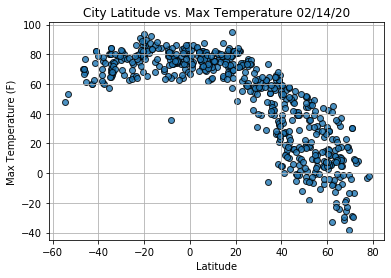

In [75]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

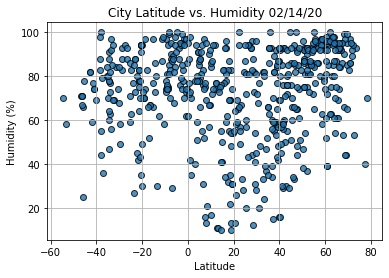

In [76]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

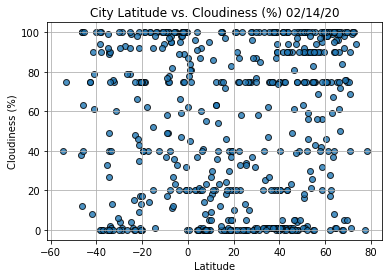

In [77]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

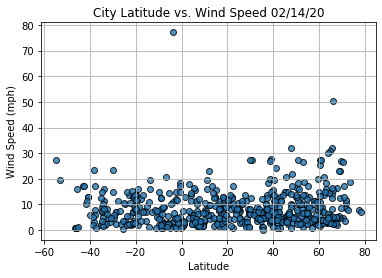

In [78]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [82]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [83]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Kuusamo,65.97,29.18,17.60,92,90,8.05,FI,2020-02-14 23:00:27
3,Tra Vinh,9.93,106.35,76.39,84,27,3.31,VN,2020-02-14 23:00:08
4,Pathein,16.78,94.73,71.40,78,18,9.26,MM,2020-02-14 23:00:27
5,Bethel,41.37,-73.41,27.00,29,1,10.29,US,2020-02-14 23:00:27
7,Aklavik,68.22,-135.01,-25.60,66,5,4.70,CA,2020-02-14 23:00:28
...,...,...,...,...,...,...,...,...,...
557,Nieves,15.33,120.95,73.40,83,75,2.24,PH,2020-02-14 23:02:33
559,Loveland,40.40,-105.08,59.00,16,1,19.46,US,2020-02-14 23:02:34
560,Krasnyy Profintern,57.74,40.44,28.40,92,40,4.47,RU,2020-02-14 23:02:34
561,Sinop,41.77,34.87,43.54,58,100,3.96,TR,2020-02-14 23:02:01


In [84]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
560     True
561     True
562    False
563    False
564     True
Name: Lat, Length: 565, dtype: bool

In [85]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

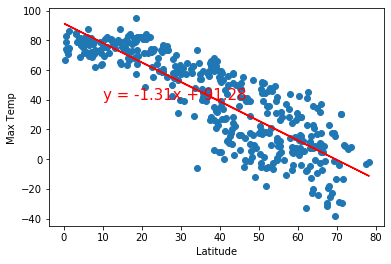

In [88]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

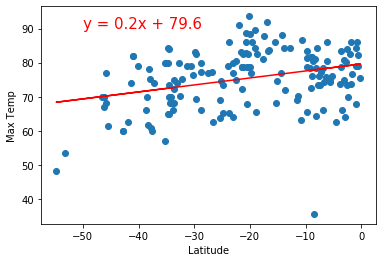

In [90]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

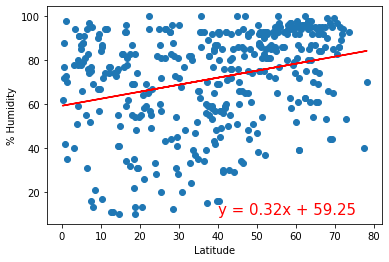

In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n                        for % Humidity', '% Humidity',(40,10))

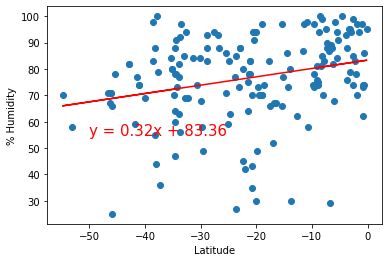

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n                        for % Humidity', '% Humidity',(-50,55))

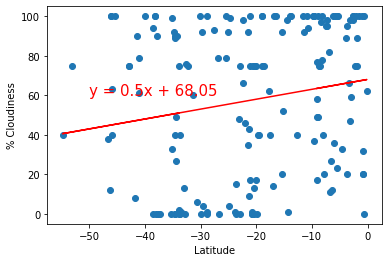

In [97]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n                        for % Cloudiness', '% Cloudiness',(-50,60))

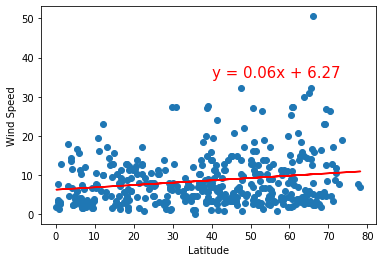

In [99]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n                        for Wind Speed', 'Wind Speed',(40,35))

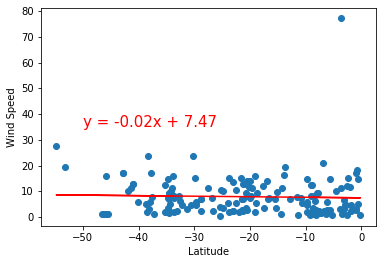

In [101]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n                        for Wind Speed', 'Wind Speed',(-50,35))